In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from glob import glob as glob
import seaborn as sns
import pandas as pd
from matplotlib.colors import ListedColormap

%matplotlib inline

import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.unicode'] = True
mpl.rcParams['mathtext.rm'] = 'Times New Roman'
mpl.rcParams['mathtext.it'] = 'Times New Roman:italic'
mpl.rcParams['mathtext.bf'] = 'Times New Roman:bold'

mpl.rc('font', family='serif', size=22)
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['xtick.major.size'] = 8
mpl.rcParams['ytick.major.size'] = 8

In [8]:
def read_hit_file(filename):
    text_file = open(filename, 'r')
    
    lines = text_file.readlines()
    hits = []
    for line in lines:
        if line.startswith('==='):
            continue
        if line.startswith('---'):
            hits.append([])
        if line.startswith('PixelHit'):
            line = line.rstrip().split()
            line = line[1:]
            for i in range(len(line)):
                line[i] = line[i].replace(',', '')
                line[i] = float(line[i])
            hits[-1].append(line)
    xhits, yhits, charge = [], [], []
    for i in range(len(hits)):
        hits[i] = zip(*hits[i])
        xhits.append(hits[i][0])
        yhits.append(hits[i][1])
        charge.append(hits[i][2])
    return xhits, yhits, charge

def track_length(x, y):
    x_dist_sq = np.power(np.max(x) - np.min(x),2.)
    y_dist_sq = np.power(np.max(y) - np.min(y),2.)
    return np.power(x_dist_sq + y_dist_sq, 0.5)


In [9]:
col_names =  ['Energy', 'Depletion Thickness ($\mu$m)', 'Track Length (pixels)', 'Deposited Charge ($N_{e^{-}}$)', 
              'Energy (GeV)', 'Charge per unit length']
df_depletion  = pd.DataFrame(columns = col_names)

depletions = ['10', '20', '30', '40', '50', '60', '70', '80', '90']
ens = ['1GeV', '10GeV']
en_float = [1000., 10000.]

counter = 0
for p, en in enumerate(ens):
    for j, dep in enumerate(depletions):
        x, y, c = read_hit_file("/Users/APizzuto/Desktop/DECO_geant/DECO_allpix/source_shielding/output/depletion_systematics/{}um_mu+_{}.txt".format(dep, en))
        try:
            for i in range(len(x)):
                length = track_length(x[i], y[i])
                charge = np.sum(c[i])
                dE_dX = charge / np.power(length**2 + (float(dep) / 0.9)**2, 0.5)
                if length > 250:
                    continue
                df_depletion.loc[counter] = [en, dep, length, charge, en_float[p], dE_dX]
                counter += 1
        except:
            continue

In [34]:
df_depletion.shape

(1961, 6)

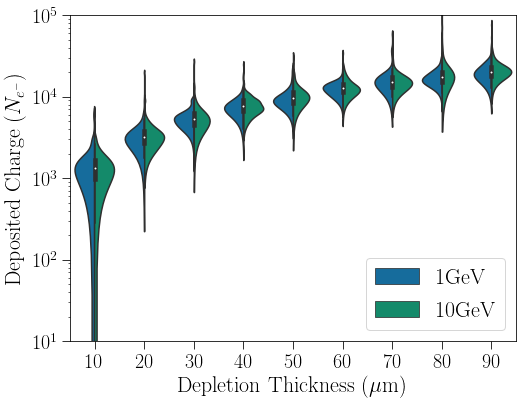

In [39]:
fig, ax = plt.subplots(figsize = (8,6))

sns.violinplot(x="Depletion Thickness ($\mu$m)", y='Deposited Charge ($N_{e^{-}}$)', hue='Energy',
                    data=df_depletion, palette="colorblind", split=True)

plt.legend(loc=4)
plt.ylim(1e1, 1e5)
plt.yscale('log')
plt.show()

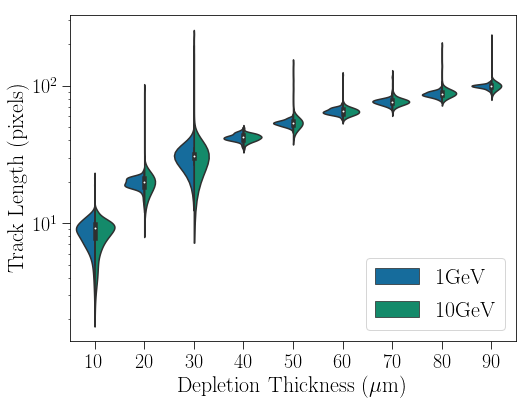

In [41]:
fig, ax = plt.subplots(figsize = (8,6))

sns.violinplot(x="Depletion Thickness ($\mu$m)", y='Track Length (pixels)', hue='Energy',
                    data=df_depletion, palette="colorblind", split=True)

plt.legend(loc=4)
#plt.ylim(1e1, 1e5)
plt.yscale('log')
plt.show()

# Threshold

In [10]:
x, y, c = read_hit_file("/Users/APizzuto/Desktop/DECO_geant/DECO_allpix/source_shielding/output/threshold_systematics/1e_mu+_1GeV.txt")      
                        

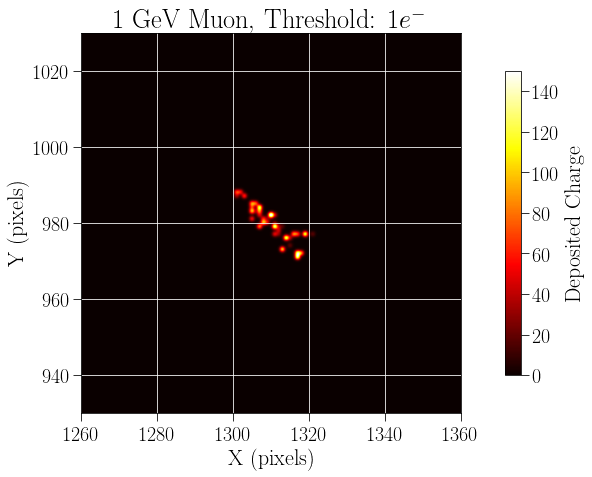

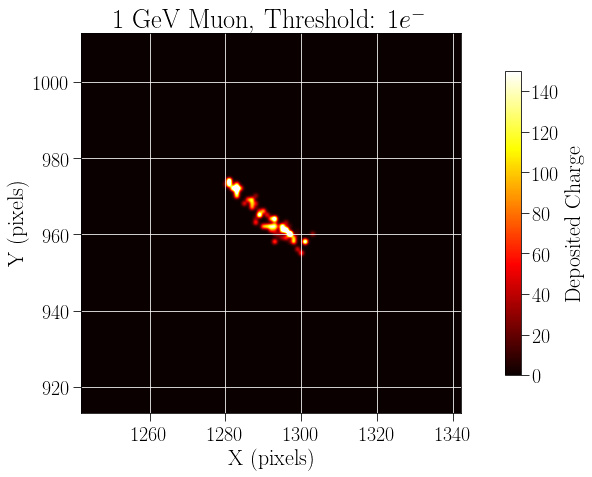

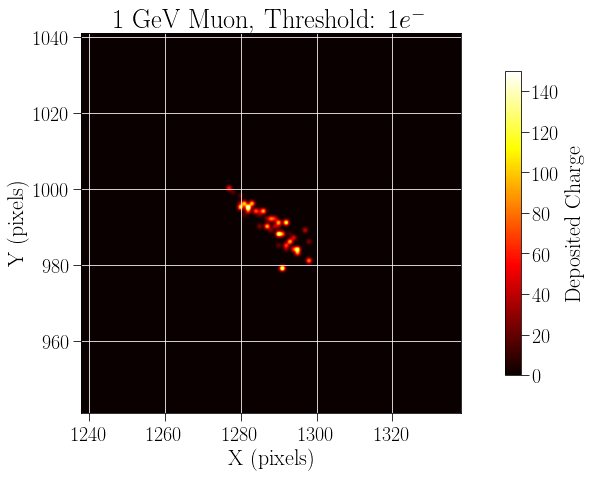

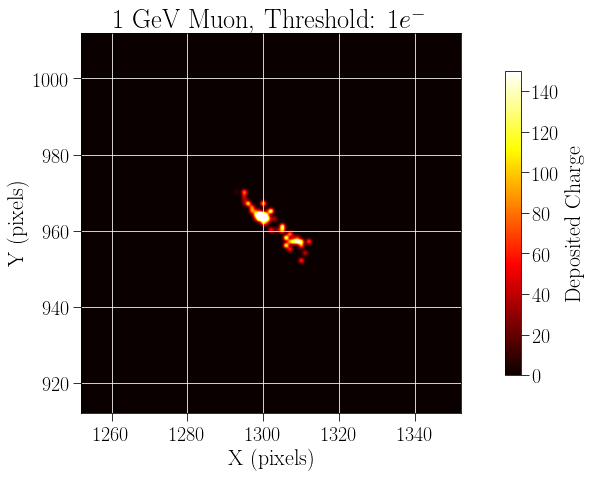

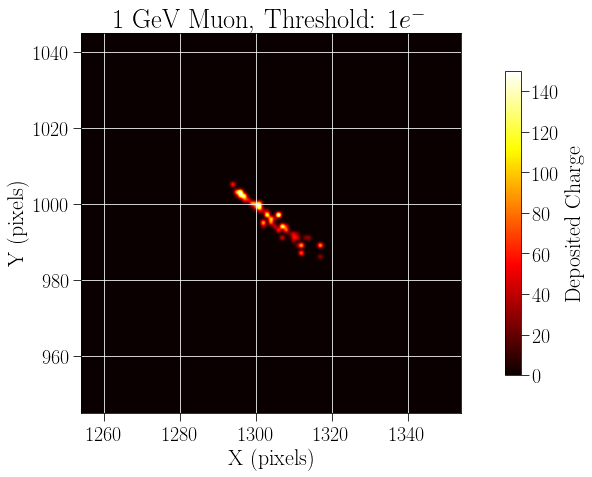

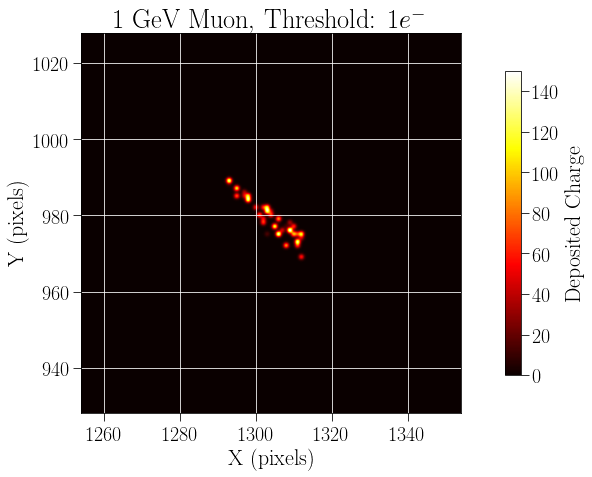

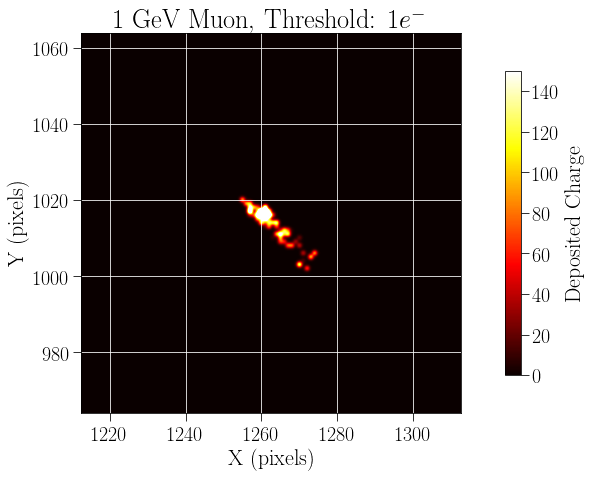

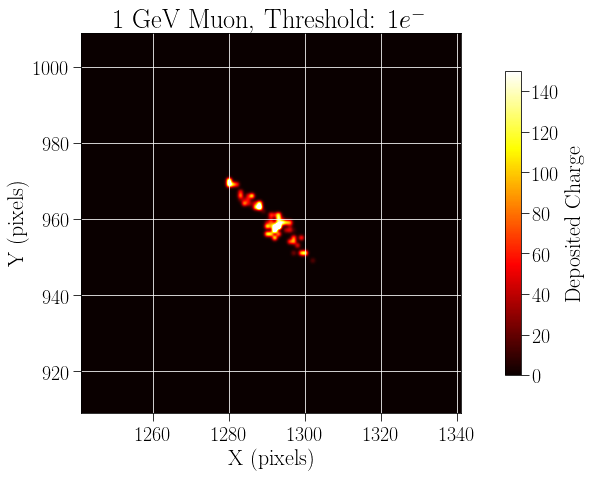

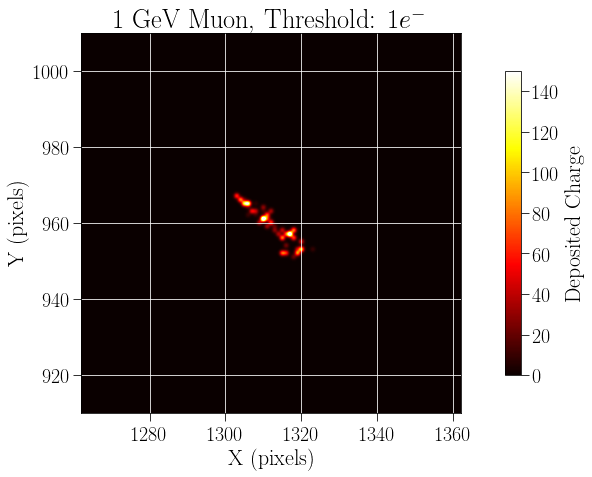

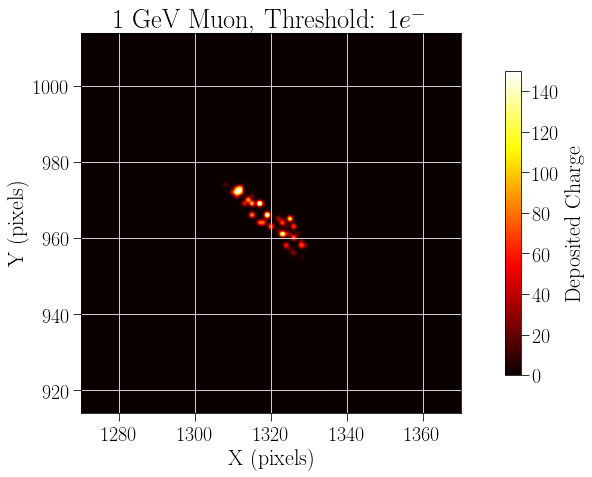

In [11]:
for j in range(10):

    image = np.zeros((3000, 3000))
    for i in range(len(x[j])):
        image[int(y[j][i]), int(x[j][i])] = c[j][i]
    
    med_x = np.median(x[j])
    med_y = np.median(y[j])
    size = 50.
    
    title = "1 GeV Muon, Threshold: 1$e^{-}$"
    fig1 = plt.figure(1, figsize=(8,7))
    ax = fig1.add_subplot(111)

    my_cmap = ListedColormap(sns.color_palette("Blues", 50))
    #my_cmap = ListedColormap(sns.palplot(sns.cubehelix_palette(8, start=2, rot=0, dark=0, light=.95, reverse=True)))
    my_cmap = mpl.cm.hot

    im = ax.imshow(image, cmap=my_cmap, interpolation="gaussian", aspect="auto", vmax=150.)
    ax.set_xlim([med_x - size, med_x + size])
    ax.set_ylim([med_y - size, med_y + size])
    ax.set_xlabel("X (pixels)")
    ax.set_ylabel("Y (pixels)")
    ax.set_title(title)

    ax.grid(color="#ffffff")
    cb = fig1.colorbar(im, orientation="vertical",
                           shrink=0.8,
                           fraction=0.05,
                           pad=0.1)
    label = "Deposited Charge"
    cb.set_label(label)
    plt.show()


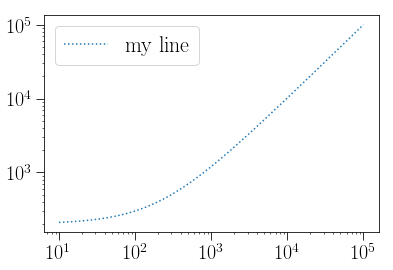

In [20]:
x = np.logspace(1., 5., 500)
y = np.logspace(1., 5., 500) + np.ones(500) * 200
plt.plot(x, y, label = "my line", linestyle = ":")
plt.legend()
plt.yscale('log')
plt.xscale('log')

In [16]:
0.003 * 180. / np.pi

0.17188733853924698